STEP 1 : Cleaning sensor data - dropping unwanted columns, removing outliers, dropping sensors that do not follow trend; Preparation - merging two csv files having temperature measurements and vegetation cover percentage

In [1]:
## INFS630 - Final project
## Priyadharshini Sakthivel - priyadharshini.sakthivel@mail.mcgill.ca
## Vaishali Mishra - vaishali.mishra@mail.mcgill.ca
## DATA CLEANING
## 19th March, 2023

In [2]:
### importing necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
### Data cleaning and preparation

## File - temperature records

# read data
Data = pd.read_csv('/Users/vaishalimishra/Desktop/Winter_2023/INFS 630 - Data Mining/Final Project/Data/sensor_data_062022_032022.csv',parse_dates=['readable_time'])

# drop unwanted columns
Data.drop(['Unnamed: 0','dstemp','humidity','time', 'batv'], inplace=True, axis=1)

Data

,temp,device,readable_time
0,18.00,sensor-19,2022-06-01 00:00:08.204
1,22.40,sensor-11,2022-06-01 00:00:13.783
2,22.02,sensor-15,2022-06-01 00:01:21.381
3,21.98,sensor-12,2022-06-01 00:01:40.184
4,21.90,sensor-13,2022-06-01 00:02:23.749
...,...,...,...
416342,3.62,sensor-45,2023-02-10 19:15:46.240
416343,3.40,sensor-40,2023-02-10 19:24:07.810
416344,3.01,sensor-43,2023-02-10 19:25:43.151
416345,3.37,sensor-37,2023-02-10 19:25:53.834


/Users/vaishalimishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Check for outliers')]

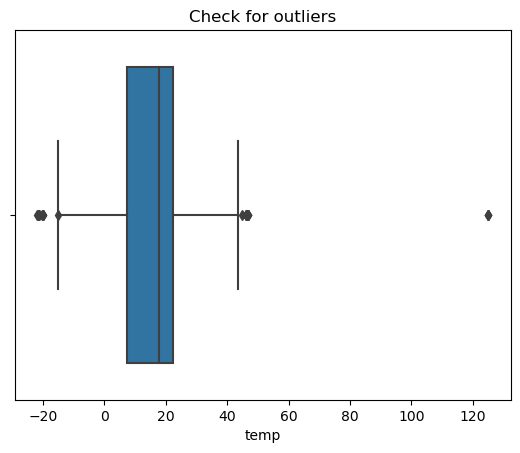

In [4]:
# boxplot to check for outliers
sns.boxplot(Data['temp']).set(title='Check for outliers')

In [5]:
## Outlier removal

# calculate interquartile range
Q1=Data.temp.quantile(0.25)
Q3=Data.temp.quantile(0.75)
IQR=Q3-Q1

# remove outliers
for i,j in Data.iterrows():
    # if temperature is lower than min limit and higher than the max limit, those values are outliers
    # values which are very far from the whiskers are eliminated
    if ((j[0]<(Q1-2*IQR)) | (j[0]>(Q3+1.7*IQR))):
        Data.drop(i,axis=0,inplace=True)
        print (j[0],j)

Data

125.0 temp                                  125.0
device                            sensor-34
readable_time    2022-08-19 20:41:17.684000
Name: 134141, dtype: object
125.0 temp                                  125.0
device                            sensor-33
readable_time    2022-09-21 00:48:29.320000
Name: 188852, dtype: object
125.0 temp                                  125.0
device                            sensor-33
readable_time    2022-10-03 12:03:48.381000
Name: 210297, dtype: object
125.0 temp                                  125.0
device                            sensor-33
readable_time    2022-11-21 10:46:48.260000
Name: 317108, dtype: object


,temp,device,readable_time
0,18.00,sensor-19,2022-06-01 00:00:08.204
1,22.40,sensor-11,2022-06-01 00:00:13.783
2,22.02,sensor-15,2022-06-01 00:01:21.381
3,21.98,sensor-12,2022-06-01 00:01:40.184
4,21.90,sensor-13,2022-06-01 00:02:23.749
...,...,...,...
416342,3.62,sensor-45,2023-02-10 19:15:46.240
416343,3.40,sensor-40,2023-02-10 19:24:07.810
416344,3.01,sensor-43,2023-02-10 19:25:43.151
416345,3.37,sensor-37,2023-02-10 19:25:53.834


/Users/vaishalimishra/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'After outlier removal')]

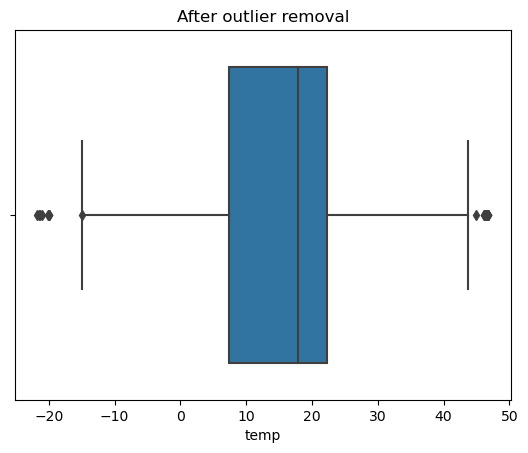

In [6]:
# boxplot to confirm the removal of outliers
sns.boxplot(Data['temp']).set(title='After outlier removal')

In [7]:
# downscale from 15 minute to 1 hour records
Data_copy=Data
Data_resampled=Data_copy.groupby([pd.Grouper(key='readable_time',freq='H'),'device']).mean()

# check for null values
Data_resampled['temp'].isnull().values.any()

#Data_resampled

False

In [8]:
# sort rows based on device and time
Data_resampled.sort_values(["device","readable_time"],axis=0, ascending=True,inplace=True)
Data_resampled

,,temp
readable_time,device,
2022-06-01 00:00:00,sensor-1,18.282500
2022-06-01 01:00:00,sensor-1,17.802500
2022-06-01 02:00:00,sensor-1,17.190000
2022-06-01 03:00:00,sensor-1,16.790000
2022-06-01 04:00:00,sensor-1,16.507500
...,...,...
2023-02-01 06:00:00,sensor-8,-0.613333
2023-02-01 07:00:00,sensor-8,-0.615000
2023-02-01 08:00:00,sensor-8,-0.620000


In [9]:
## File 2 - vegetaion and impermeable percentage

# read file
Vegetation = pd.read_csv('/Users/vaishalimishra/Desktop/Winter_2023/INFS 630 - Data Mining/Final Project/Data/impermeable.csv')

# round values
Vegetation['lu_vege_pc']=Vegetation['lu_vege_pc'].round(2)
Vegetation['impermeable']=Vegetation['impermeable'].round(2)

# set 'device' as index for ease in merging ['device' of Data_resampled is already an index ]
Vegetation.set_index('device',inplace=True)

In [10]:
# merge two csv files to create new csv file
Data_final = pd.merge(left=Data_resampled, right=Vegetation, how='inner', left_index=True, right_index=True)
Data_final

,,temp,lu_vege_pc,impermeable
readable_time,device,,,
2022-06-01 00:00:00,sensor-1,18.282500,5.11,94.89
2022-06-01 01:00:00,sensor-1,17.802500,5.11,94.89
2022-06-01 02:00:00,sensor-1,17.190000,5.11,94.89
2022-06-01 03:00:00,sensor-1,16.790000,5.11,94.89
2022-06-01 04:00:00,sensor-1,16.507500,5.11,94.89
...,...,...,...,...
2023-02-01 06:00:00,sensor-8,-0.613333,63.85,36.15
2023-02-01 07:00:00,sensor-8,-0.615000,63.85,36.15
2023-02-01 08:00:00,sensor-8,-0.620000,63.85,36.15


In [11]:
# Check for null values
# [There will be NaN values in vegetation column, because some sensors in the 'Data'csv are not in the 'Vegetation' csv]
Data_final['lu_vege_pc'].isnull().values.any()

False

In [12]:
Data_final

,,temp,lu_vege_pc,impermeable
readable_time,device,,,
2022-06-01 00:00:00,sensor-1,18.282500,5.11,94.89
2022-06-01 01:00:00,sensor-1,17.802500,5.11,94.89
2022-06-01 02:00:00,sensor-1,17.190000,5.11,94.89
2022-06-01 03:00:00,sensor-1,16.790000,5.11,94.89
2022-06-01 04:00:00,sensor-1,16.507500,5.11,94.89
...,...,...,...,...
2023-02-01 06:00:00,sensor-8,-0.613333,63.85,36.15
2023-02-01 07:00:00,sensor-8,-0.615000,63.85,36.15
2023-02-01 08:00:00,sensor-8,-0.620000,63.85,36.15


<AxesSubplot:xlabel='readable_time'>

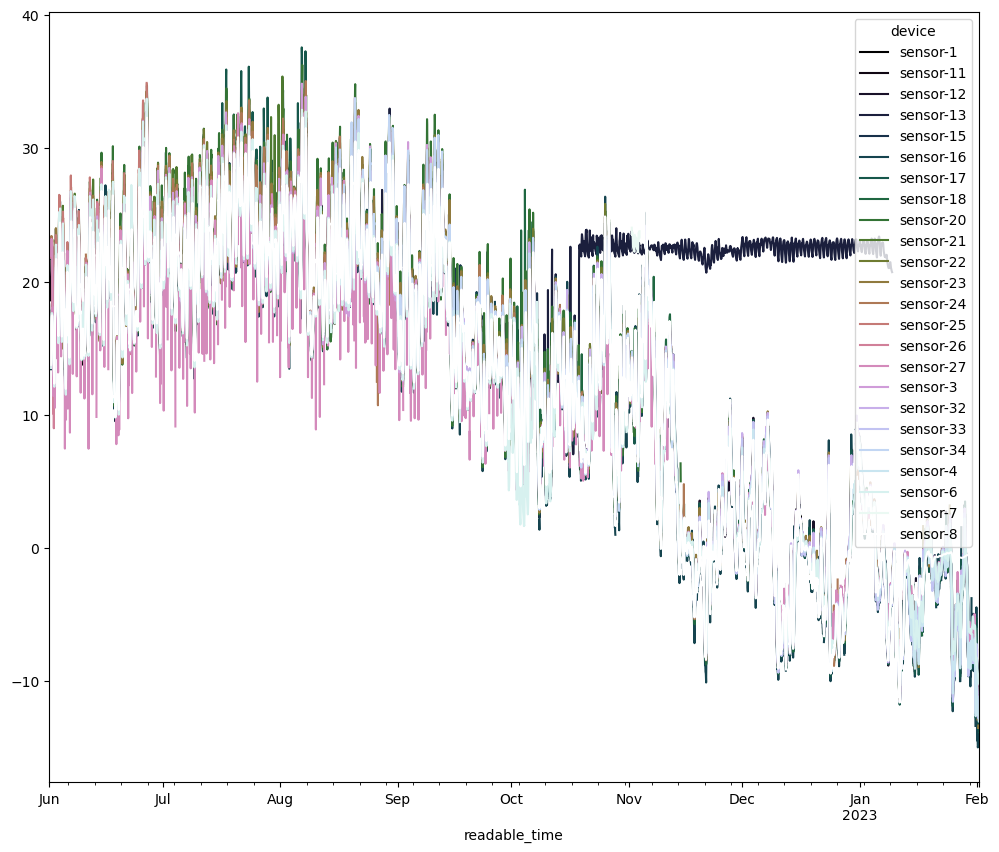

In [13]:
# plot data to find sensors that do not follow trend
Data_final.pivot_table(values='temp',index='readable_time',columns='device').reset_index().plot(x='readable_time',colormap=cm.cubehelix,figsize=(12,10))


In [14]:
# reset index to remove sensors that do not follow trend
Data_final = Data_final.reset_index()

# removing sensor 7 and 13
Data_final = Data_final[Data_final.device != 'sensor-7']
Data_final = Data_final[Data_final.device != 'sensor-13']

In [15]:
Data_final

,readable_time,device,temp,lu_vege_pc,impermeable
0,2022-06-01 00:00:00,sensor-1,18.282500,5.11,94.89
1,2022-06-01 01:00:00,sensor-1,17.802500,5.11,94.89
2,2022-06-01 02:00:00,sensor-1,17.190000,5.11,94.89
3,2022-06-01 03:00:00,sensor-1,16.790000,5.11,94.89
4,2022-06-01 04:00:00,sensor-1,16.507500,5.11,94.89
...,...,...,...,...,...
97333,2023-02-01 06:00:00,sensor-8,-0.613333,63.85,36.15
97334,2023-02-01 07:00:00,sensor-8,-0.615000,63.85,36.15
97335,2023-02-01 08:00:00,sensor-8,-0.620000,63.85,36.15
97336,2023-02-01 09:00:00,sensor-8,-0.620000,63.85,36.15


<AxesSubplot:xlabel='readable_time'>

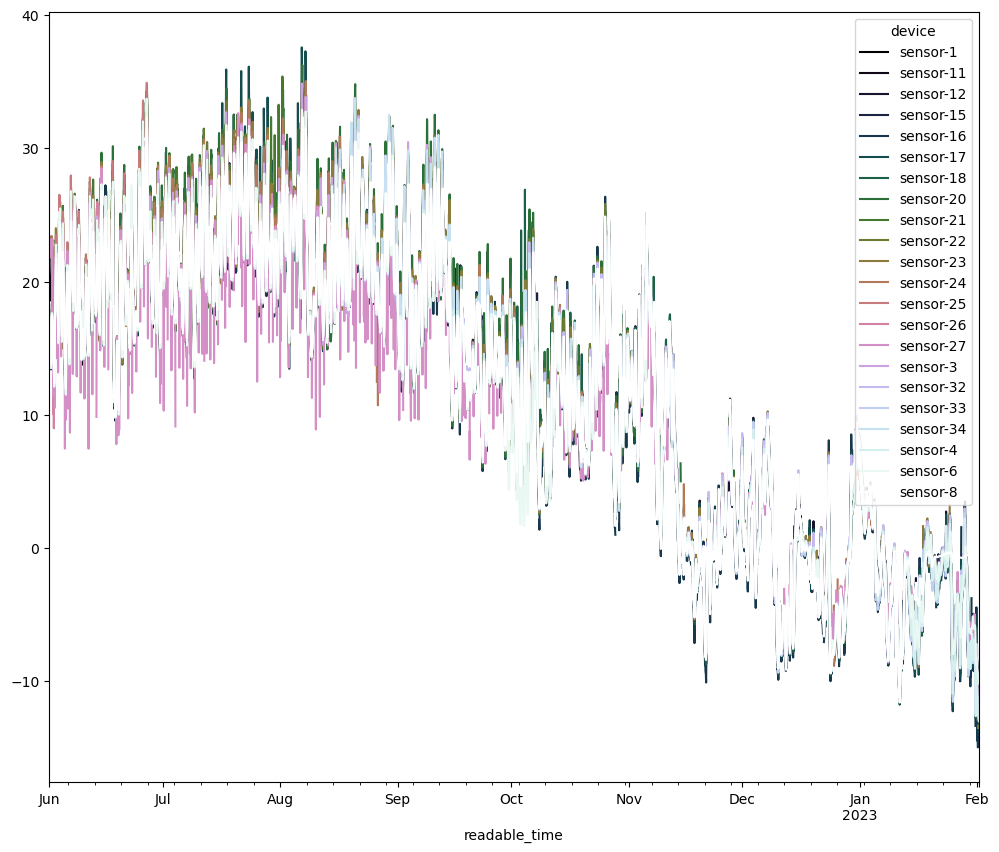

In [16]:
#Plotting after removing sensors
Data_final.pivot_table(values='temp',index='readable_time',columns='device').reset_index().plot(x='readable_time',colormap=cm.cubehelix,figsize=(12,10))

In [17]:
Data_final.drop(['device','impermeable'], inplace=True, axis=1)
Data_final

,readable_time,temp,lu_vege_pc
0,2022-06-01 00:00:00,18.282500,5.11
1,2022-06-01 01:00:00,17.802500,5.11
2,2022-06-01 02:00:00,17.190000,5.11
3,2022-06-01 03:00:00,16.790000,5.11
4,2022-06-01 04:00:00,16.507500,5.11
...,...,...,...
97333,2023-02-01 06:00:00,-0.613333,63.85
97334,2023-02-01 07:00:00,-0.615000,63.85
97335,2023-02-01 08:00:00,-0.620000,63.85
97336,2023-02-01 09:00:00,-0.620000,63.85


In [18]:
Data_final.dtypes

readable_time    datetime64[ns]
temp                    float64
lu_vege_pc              float64
dtype: object

In [19]:
# save as csv
Data_final.to_csv('/Users/vaishalimishra/Desktop/Winter_2023/INFS 630 - Data Mining/Final Project/Data/Data_prepped.csv')